##Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

In [3]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

# Our data is a little hard to understand. Let's visualize it.

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


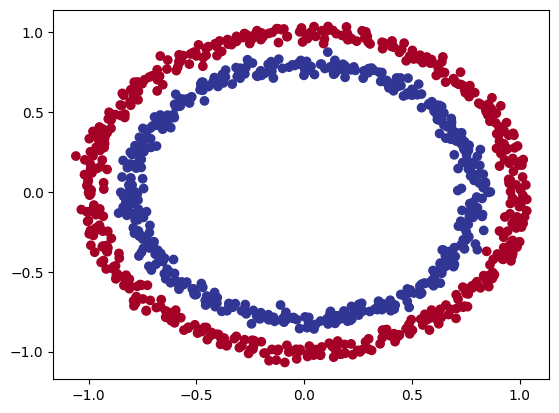

In [6]:
#Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=y, cmap= plt.cm.RdYlBu);

##Input and output shapes

In [7]:
#Check the shape of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
len(X), len(y)

(1000, 1000)

In [9]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [10]:
import tensorflow as tf

In [11]:
#Set random seed
tf.random.set_seed(42)

#Create model using the Sequential API
model_1 =  tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

#Fit the model
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 6s 4ms/step - loss: 4.0796 - accuracy: 0.4690
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 2.6513 - accuracy: 0.4760
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7567 - accuracy: 0.4900
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7113 - accuracy: 0.4900
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6999 - accuracy: 0.4900


In [12]:
#Let's try and improve our model by training for longer
model_1.fit(X,y,epochs=200,verbose=None)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [13]:
#Let's add another layer
tf.random.set_seed(42)

#Create a layer and this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

#Fit the model
model_2.fit(X,y,epochs=100,verbose = None)

In [14]:
#Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

#Improving our model
* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function
* Change the learning rate
* Fitting on more data
* Fitting for longer

In [15]:
#Set random seeds
tf.random.set_seed(42)

#Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#Fit the model
model_3.fit(X,y,epochs=100,verbose=0)

In [16]:
#Evaluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6959 - accuracy: 0.5150


[0.6958581805229187, 0.5149999856948853]

In [17]:
import numpy as np

In [18]:
#Let's create a function to visualize our model's prediction
def plot_decision_boundary(model,X,y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  #Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

  xx,yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                      np.linspace(y_min, y_max, 100))
  #Create X value (We're going to make predictions on it)
  x_in = np.c_[xx.ravel(),yy.ravel()] #stack 2d arrays together

  #Make predictions
  y_pred = model.predict(x_in)

  #Check for multiclass
  if len(y_pred[0])>1:
    print("doing multiclass classification")
    #We have to reshape our prediction to get them ready for plotting.
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

    #Plot the decision boundary
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
    plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 1s 2ms/step
doing binary classification


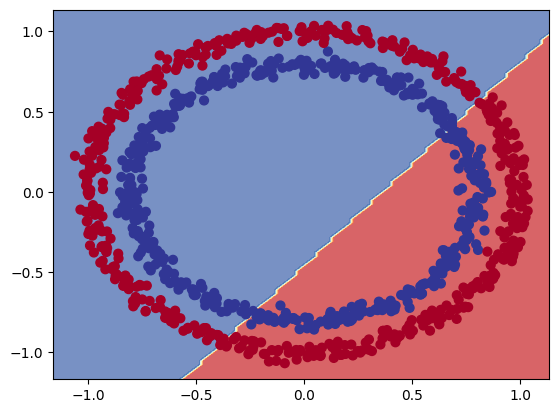

In [19]:
#Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [20]:
#Let's see if our model can be used for a regression problem

tf.random.set_seed(42)

#Create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5)

#Split our data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [21]:
tf.random.set_seed(42)

#Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Compile the model and this time with regression specific loss function
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

#Fit the model
model_3.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 583.5554 - mae: 583.5554
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 503.4367 - mae: 503.4367
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 427.2675 - mae: 427.2675
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 349.2454 - mae: 349.2454
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 268.8854 - mae: 268.8854
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 182.2823 - mae: 182.2823
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 91.5717 - mae: 91.5717
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 52.3871 - mae: 52.3871
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 70.6093 - mae: 70.6093
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 61.7491 - mae: 61.7491
Epoch 11/100
5/5 [=============================

2/2 [==============================] - 0s 5ms/step


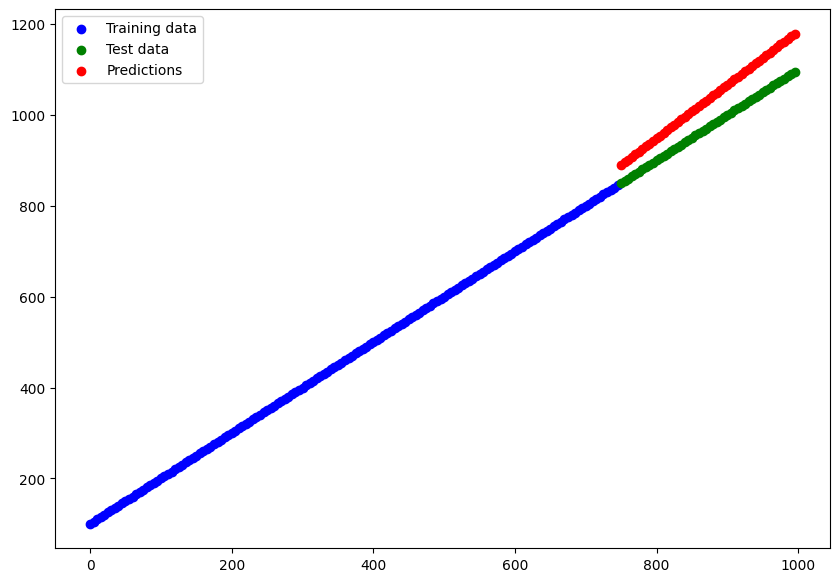

In [22]:
#Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

#Plot the model's predictions against our trained model
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c="b",label="Training data")
plt.scatter(X_reg_test,y_reg_test,c="g", label="Test data")
plt.scatter(X_reg_test,y_reg_preds,c="r",label="Predictions")
plt.legend()

Non-linearity

In [23]:
tf.random.set_seed(42)

#Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
])

#Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr=0.001 ),
                metrics=["accuracy"])

#Fit the model
history = model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.3246 - accuracy: 0.4660
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2708 - accuracy: 0.4650
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2077 - accuracy: 0.4670
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1185 - accuracy: 0.4690
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0862 - accuracy: 0.4750
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0683 - accuracy: 0.4760
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0502 - accuracy: 0.4770
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0440 - accuracy: 0.4740
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9977 - accuracy: 0.4760
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9508 - accuracy: 0.4760
Epoch 11/

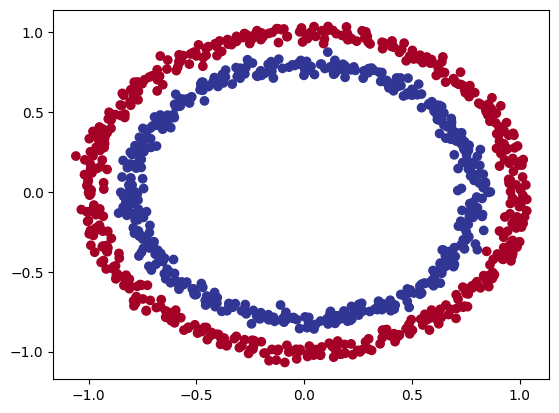

In [24]:
#Check our data
plt.scatter(X[:,0], X[:,1],c=y,cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classification


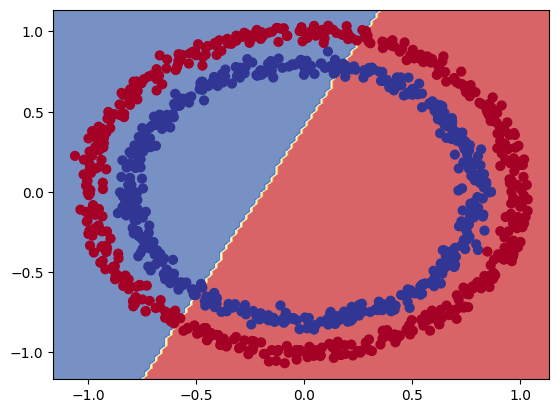

In [25]:
#Check decision boundary for our latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

In [26]:
#Let's create our neural network with a non-linear activation function
tf.random.set_seed(42)

#Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation = tf.keras.activations.relu)
])

#Compile the model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ["accuracy"])

#Fit the model
history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 6.1526 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 6.1502 - accuracy: 0.4830
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 6.1495 - accuracy: 0.4820
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 6.1315 - accuracy: 0.4830
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 6.1132 - accuracy: 0.4810
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 6.1124 - accuracy: 0.4820
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 6.0713 - accuracy: 0.4810
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 6.0483 - accuracy: 0.4800
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 6.0336 - accuracy: 0.4780
Epoch 10/100
32/32 [==============================] - 0s 6ms/step - loss: 6.0331 - accuracy: 0.4780
Epoch 11/

In [27]:
#Let's duplicate the multi-layer neural network from Tensorflow Playground
tf.random.set_seed(42)

#Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

#Compile the model
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ["accuracy"])

#Fit the model
history = model_6.fit(X,y,epochs = 250)

Epoch 1/250
32/32 [==============================] - 1s 3ms/step - loss: 6.9930 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 5.1523 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 4ms/step - loss: 3.9650 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 3.7866 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 3.6851 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 3.5589 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 4ms/step - loss: 3.4423 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 4ms/step - loss: 3.2101 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 4ms/step - loss: 3.1036 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 2.9599 - accuracy: 0.5000
Epoch 11/

In [28]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1870 - accuracy: 0.9780


[0.1870431751012802, 0.9779999852180481]

313/313 [==============================] - 1s 1ms/step
doing binary classification


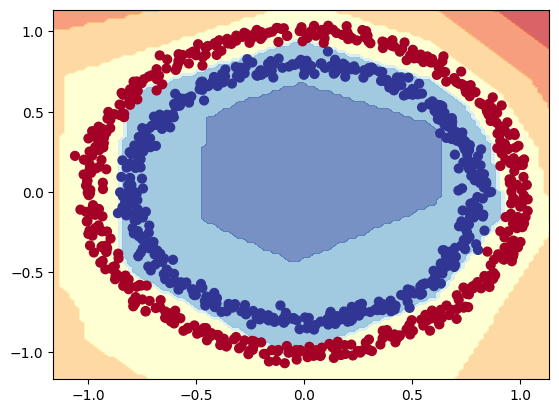

In [29]:
#How do our model predictions look?
plot_decision_boundary(model_6,X,y)

In [30]:
tf.random.set_seed(42)

#Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

#Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#Fit the model
history = model_7.fit(X,y,epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 3ms/step - loss: 0.6907 - accuracy: 0.4980
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5080
Epoch 3/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6884 - accuracy: 0.5140
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6875 - accuracy: 0.5210
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.5190
Epoch 6/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6859 - accuracy: 0.5180
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6849 - accuracy: 0.5240
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6844 - accuracy: 0.5300
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6834 - accuracy: 0.5290
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6828 - accuracy: 0.5270
Epoch 11/

In [31]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0862 - accuracy: 0.9910


[0.08624511957168579, 0.9909999966621399]

313/313 [==============================] - 1s 1ms/step
doing binary classification


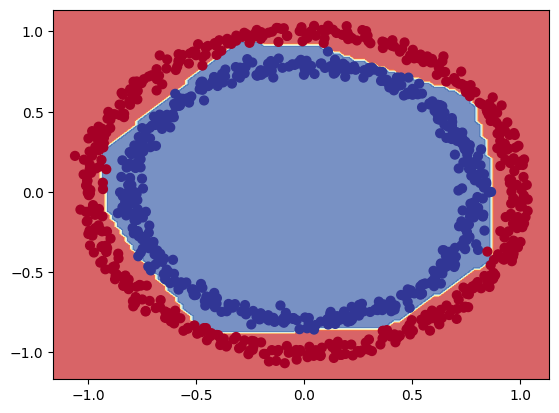

In [32]:
plot_decision_boundary(model_7,X,y)

In [33]:
#Create a toy a tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

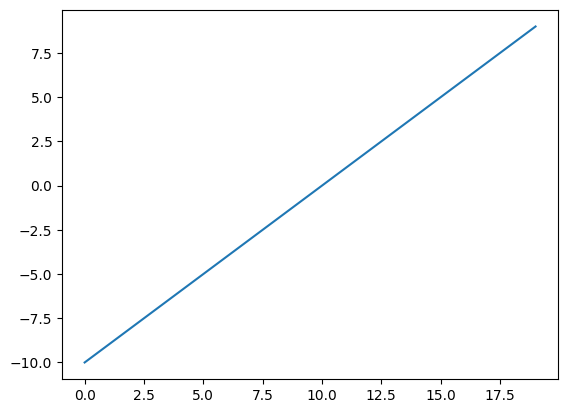

In [34]:
#Visualize our toy tensor
plt.plot(A);

In [35]:
# Let's start by replicating sigmoid - sgmodi(x) = 1 / (1 +  exp(-x))
def sigmoid(x):
  return 1/(1+tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

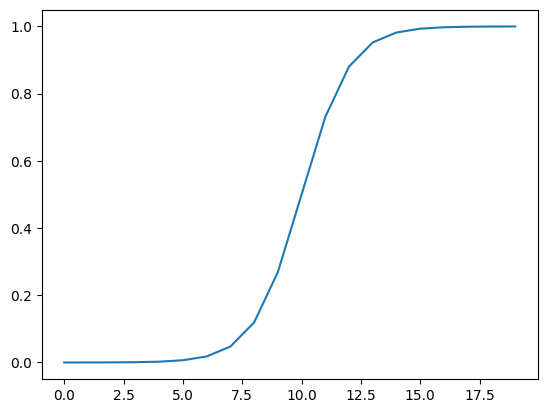

In [36]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [37]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0,x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

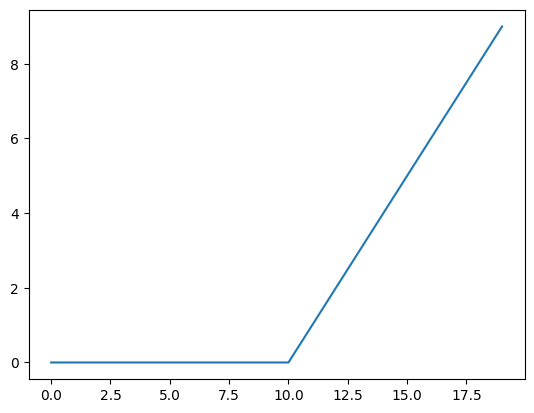

In [38]:
# Plot ReLU-modified tensor
plt.plot(relu(A));

In [39]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

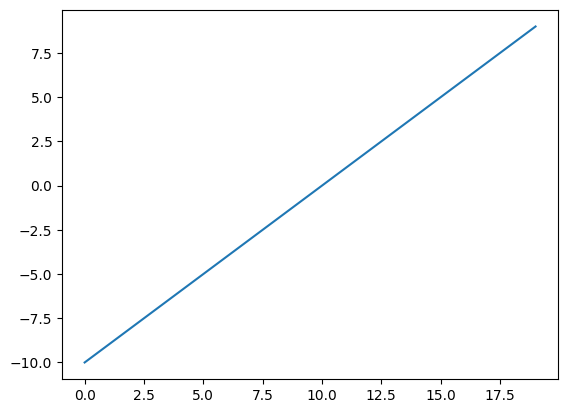

In [40]:
plt.plot(tf.keras.activations.linear(A));

  ## Evaluating and Improving our classification

In [41]:
len(X)

1000

In [42]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [43]:
# Let's re-create a model to fit on the training data and evaluate on the test data

tf.random.set_seed(42)

# Create the model (same as model_7)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,tf.keras.activations.sigmoid)
])

# Compile the model

model_8.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["accuracy"])

# Fit the model

history = model_8.fit(X_train, y_train, epochs = 25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6891 - accuracy: 0.5088
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6771 - accuracy: 0.5813
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6629 - accuracy: 0.6050
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6426 - accuracy: 0.7013
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6103 - accuracy: 0.7800
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5697 - accuracy: 0.7912
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5174 - accuracy: 0.8775
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4643 - accuracy: 0.9100
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4056 - accuracy: 0.9362
Epoch 10/25
25/25 [==============================] - 0s 4ms/step - loss: 0.3438 - accuracy: 0.9638
Epoch 11/25
25/25 [

In [44]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0438 - accuracy: 0.9950


[0.04377807304263115, 0.9950000047683716]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


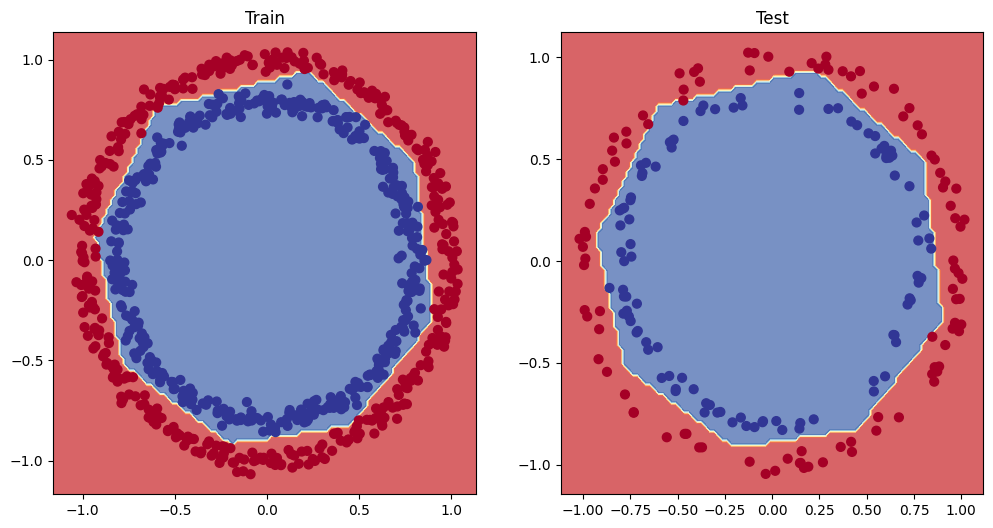

In [45]:
# Plot the decision boundaries for the training and test sets

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

## Plot the loss (or training) curves

In [46]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.689053,0.50875
1,0.677144,0.58125
2,0.662875,0.60500
3,0.642551,0.70125
4,0.610288,0.78000
5,0.569665,0.79125
6,0.517433,0.87750
7,0.464281,0.91000
8,0.405563,0.93625
9,0.343808,0.96375


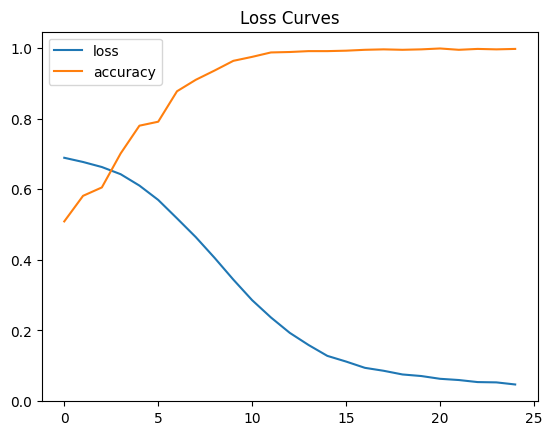

In [47]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Loss Curves");

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we are going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your model *while* its training.
* Another model (we could use the same one as above, but we are practicing building models here)
* A modified loss curves plot

In [48]:
tf.random.set_seed(42)

# Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,tf.keras.activations.sigmoid)
])

# Compile the model
model_9.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
history_9 = model_9.fit(X_train, y_train, epochs = 100, callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7020 - accuracy: 0.5225 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7017 - accuracy: 0.5188 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7014 - accuracy: 0.5200 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7011 - accuracy: 0.5175 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7008 - accuracy: 0.5163 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7005 - accuracy: 0.5113 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7001 - accuracy: 0.5100 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6997 - accuracy: 0.5100 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss:

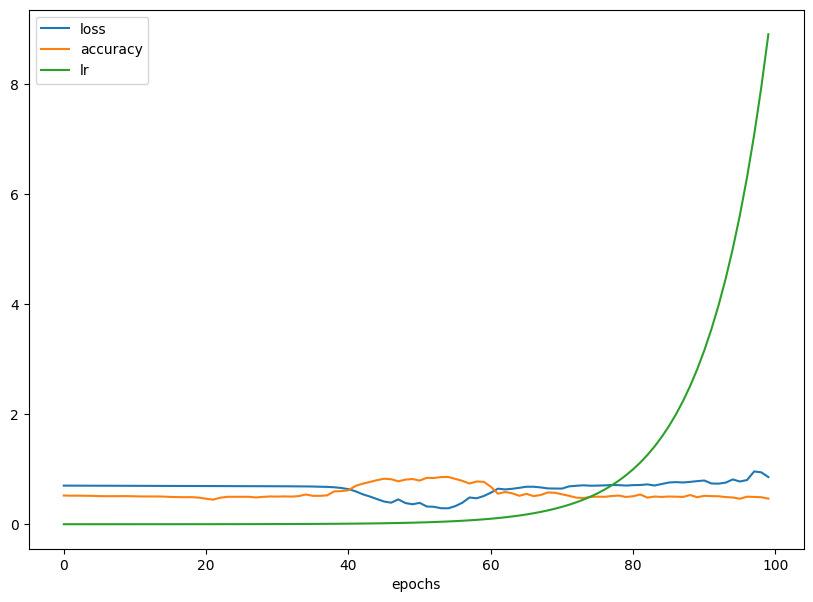

In [49]:
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel="epochs");

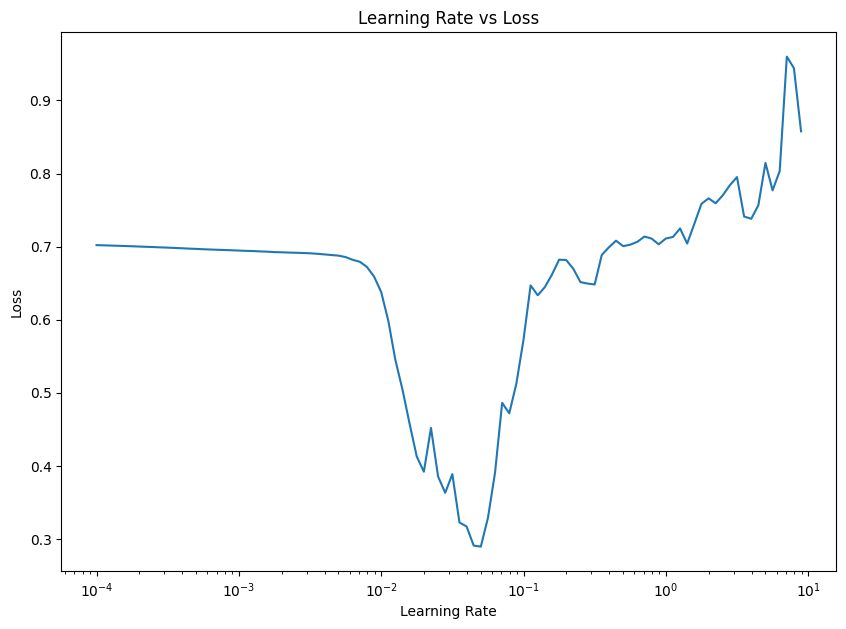

In [50]:
# Plot the learning rate vs Loss

lrs = 1e-4 * 10**(tf.range(100)/20)
plt.figure(figsize = (10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")
plt.show();

In [51]:
# Let's try using a higher *ideal* learning rate with the same model

tf.random.set_seed(42)

# Create the model

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation = tf.keras.activations.sigmoid)
])

# Compile the model
model_10.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate = 0.02),
                 metrics = ["accuracy"])

# Fit the model for 10 epochs (5 epochs less than before)

history_10 = model_10.fit(X_train, y_train, epochs = 20)

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6951 - accuracy: 0.4812
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6896 - accuracy: 0.5188
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.5300
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6801 - accuracy: 0.5500
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6717 - accuracy: 0.5875
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6547 - accuracy: 0.5863
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6404 - accuracy: 0.6137
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6264 - accuracy: 0.6413
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6032 - accuracy: 0.6675
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5797 - accuracy: 0.6850
Epoch 11/20
25/25 [

In [52]:
  model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0765 - accuracy: 0.9900


[0.07648675888776779, 0.9900000095367432]

In [53]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0438 - accuracy: 0.9950


[0.04377807304263115, 0.9950000047683716]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


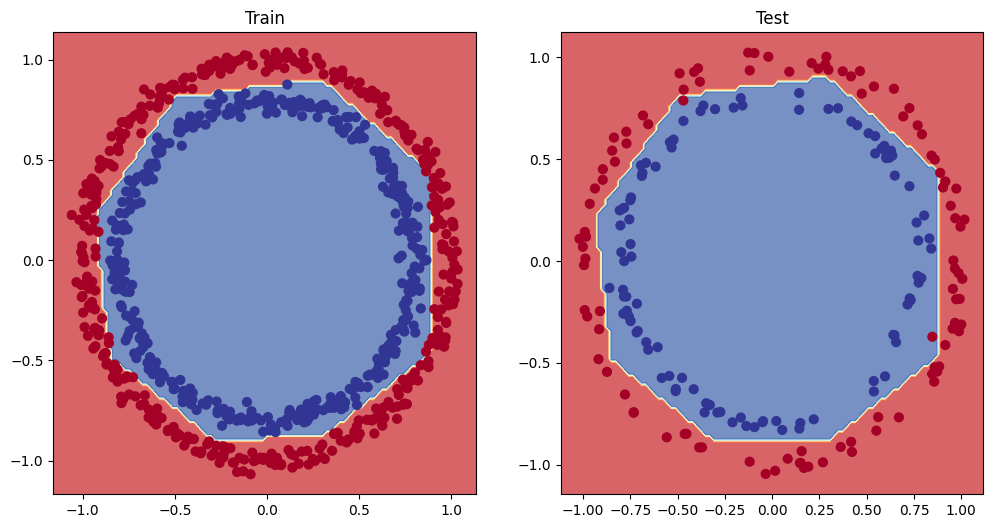

In [54]:
# Plot the decision boundaries for the training and test sets

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10,X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10,X=X_test, y=y_test)
plt.show();

## More classification evaluation methods
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix

In [55]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0765 - accuracy: 0.9900
Model loss on the test set: 0.07648675888776779
Model accuracy on the test set 99.00%


## Confusion Matrix

In [56]:
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

y_preds[:10]



7/7 [==============================] - 0s 2ms/step


array([[0.94182646],
       [0.94182646],
       [0.94182646],
       [0.94182646],
       [0.08591236],
       [0.08727819],
       [0.94182646],
       [0.01902135],
       [0.94182646],
       [0.45607105]], dtype=float32)

In [57]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [58]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [59]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

In [60]:
# The confusion matrix we're about to write is a remix of scikit-learn's plot_confusion_matrix

import itertools

figsize = (10,10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] #normalize our confusion matrix

In [61]:
cm_norm

array([[0.98019802, 0.01980198],
       [0.        , 1.        ]])

##Working with a larger example (multiclass classification)

* To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

In [62]:
from tensorflow.keras.datasets import fashion_mnist

In [63]:
# The data has already set into training and test sets
(train_data,train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [64]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

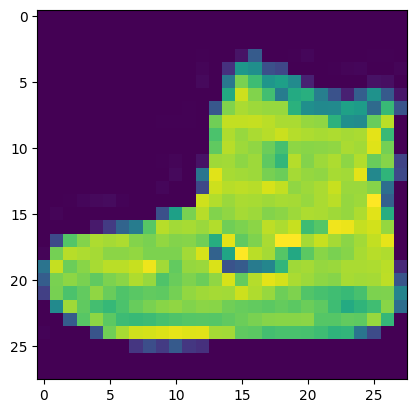

In [65]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [66]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

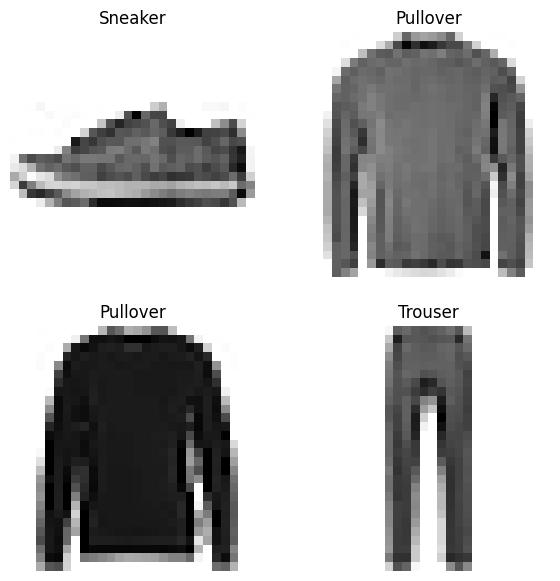

In [67]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize = (7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  ax.axis(False)

## Building a multi-class classification model
* Input shape = 28 x 28
* Output shape = 1 per class name
* Loss function = tf.keras.losses.CategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)
* If your labels are one-hot encoded, use CategoricalCrossEntropy()
* If your labels are not one-hot encoded use SparseCategoricalCrossEntropy()

In [68]:
train_data[0].shape

(28, 28)

In [69]:
len(class_names)

10

In [70]:
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28))])
flatten_model.output_shape

(None, 784)

In [71]:
#Create the model
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)]
)

#Compile the model
model_11.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

#Fit the model
non_norm_history = model_11.fit(train_data,
             tf.one_hot(train_labels, depth=10),
             epochs = 10,
             validation_data = (test_data,tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3703 - accuracy: 0.1603 - val_loss: 1.9667 - val_accuracy: 0.2186
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8663 - accuracy: 0.2637 - val_loss: 1.7240 - val_accuracy: 0.3104
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5233 - accuracy: 0.3721 - val_loss: 1.3336 - val_accuracy: 0.4405
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3185 - accuracy: 0.4245 - val_loss: 1.2943 - val_accuracy: 0.4290
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2207 - accuracy: 0.4573 - val_loss: 1.1693 - val_accuracy: 0.4751
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1369 - accuracy: 0.4876 - val_loss: 1.1359 - val_accuracy: 0.4604
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1099 - accuracy: 0.5097 - val_loss: 1.1444 - val_accuracy:

In [72]:
model_11.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                 3140      
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors between 0 & 1.

In [74]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum.
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [75]:
# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [76]:
# Now our data is normalized and let's build a model to find patterns in it.

tf.random.set_seed(42)

# Create the model (same as model_11)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation= tf.keras.activations.softmax)
])

# Compile the model
model_12.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"]
                 )

# Fit the model
norm_history = model_12.fit(train_data_norm,
              tf.one_hot(train_labels, depth = 10),
              epochs = 10,
              validation_data = (test_data_norm, tf.one_hot(test_labels, depth = 10)))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1651 - accuracy: 0.5760 - val_loss: 0.8186 - val_accuracy: 0.7062
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7348 - accuracy: 0.7229 - val_loss: 0.7077 - val_accuracy: 0.7217
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6683 - accuracy: 0.7366 - val_loss: 0.6747 - val_accuracy: 0.7330
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6414 - accuracy: 0.7497 - val_loss: 0.6608 - val_accuracy: 0.7495
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6246 - accuracy: 0.7635 - val_loss: 0.6452 - val_accuracy: 0.7476
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6109 - accuracy: 0.7677 - val_loss: 0.6394 - val_accuracy: 0.7529
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6016 - accuracy: 0.7696 - val_loss: 0.6341 - val_accuracy:

Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1).

<Axes: title={'center': 'Normalized-Data'}>

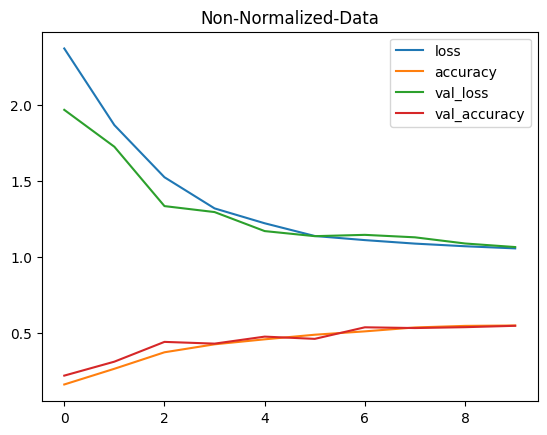

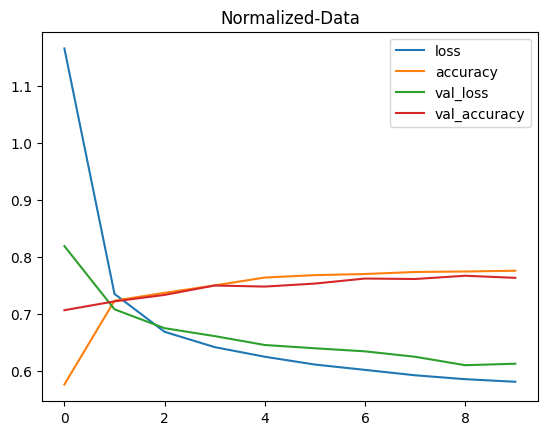

In [77]:
#import pandas as pd

#Plot non_normalized_data
pd.DataFrame(non_norm_history.history).plot(title="Non-Normalized-Data")

#Plot normalized_data
pd.DataFrame(norm_history.history).plot(title = "Normalized-Data")

**Note:** The same model with even slightly different data can produce *dramatically* different results. So when you are comparing models, it's important to make sure you're comparing them on the same criteria. (e.g. same architecture but different data or same data but different architecture).

## Finding the ideal learning rate

In [78]:
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])

# Compile model
model_13.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               tf.one_hot(train_labels, depth = 10),
                               epochs = 40,
                               validation_data = (test_data_norm, tf.one_hot(test_labels, depth = 10)),
                               callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.5214 - accuracy: 0.3599 - val_loss: 1.1184 - val_accuracy: 0.5358 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9379 - accuracy: 0.6190 - val_loss: 0.8743 - val_accuracy: 0.6499 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8280 - accuracy: 0.6654 - val_loss: 0.8383 - val_accuracy: 0.6767 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7918 - accuracy: 0.6785 - val_loss: 0.8102 - val_accuracy: 0.6785 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7689 - accuracy: 0.6866 - val_loss: 0.7829 - val_accuracy: 0.6884 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7437 - accuracy: 0.7031 - val_loss: 0.7889 - val_accuracy: 0.7159 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

<Axes: title={'center': 'Finding lr'}>

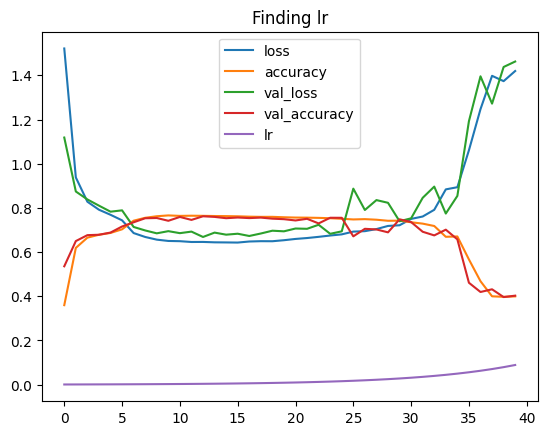

In [79]:
pd.DataFrame(find_lr_history.history).plot(title = "Finding lr")

Text(0.5, 1.0, 'Finding the ideal learning rate')

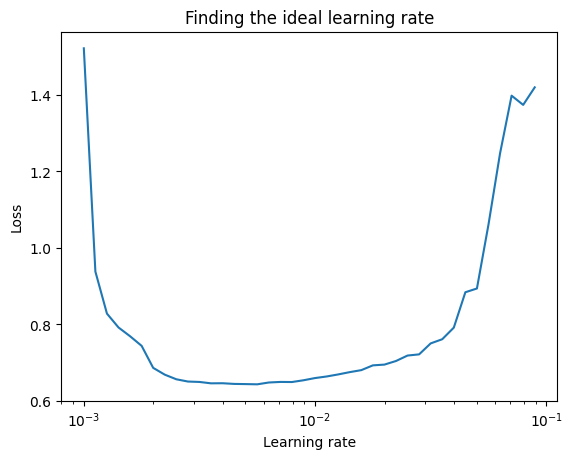

In [80]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [81]:
# Ideal learning rate is 0.001 which is the default lr for Adams optimizer

In [82]:
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])

# Compile the model
model_14.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                 metrics = ["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_norm,
                          tf.one_hot(train_labels, depth = 10),
                          epochs = 20,
                          validation_data = (test_data_norm, tf.one_hot(test_labels, depth = 10)))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1575 - accuracy: 0.5987 - val_loss: 0.8301 - val_accuracy: 0.7204
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7397 - accuracy: 0.7488 - val_loss: 0.6999 - val_accuracy: 0.7673
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6601 - accuracy: 0.7675 - val_loss: 0.6554 - val_accuracy: 0.7743
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6297 - accuracy: 0.7763 - val_loss: 0.6390 - val_accuracy: 0.7801
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6151 - accuracy: 0.7808 - val_loss: 0.6457 - val_accuracy: 0.7795
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6048 - accuracy: 0.7839 - val_loss: 0.6333 - val_accuracy: 0.7792
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5992 - accuracy: 0.7876 - val_loss: 0.6632 - val_accuracy:

## Evaluating our multi-class classification model

In [83]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [84]:
y_probs = model_14.predict(test_data_norm)
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[3.9436241e-09, 4.3985460e-07, 1.5113751e-10, 6.1442501e-07,
        6.3216881e-08, 1.1310141e-01, 5.1597464e-09, 5.9976405e-01,
        7.6157572e-05, 2.8705728e-01],
       [2.9638610e-04, 7.9104549e-11, 7.1372330e-01, 1.7553774e-03,
        2.2343047e-01, 1.1817348e-12, 6.0794383e-02, 1.0630504e-24,
        8.1105874e-08, 9.4091398e-30],
       [9.9287710e-05, 9.9225628e-01, 2.9234142e-08, 7.6291333e-03,
        4.1214484e-08, 1.3898699e-05, 8.5557112e-08, 1.2412836e-13,
        2.9931762e-11, 1.1950838e-06],
       [1.4915230e-05, 9.9461102e-01, 2.8965756e-09, 5.3312425e-03,
        1.0353606e-08, 3.6572630e-05, 7.1482025e-09, 2.2736130e-13,
        4.5254868e-12, 6.1649371e-06],
       [1.2934780e-01, 4.8796664e-05, 2.9080808e-01, 3.0543400e-02,
        3.3592883e-02, 5.0865619e-08, 5.1558930e-01, 1.2471533e-15,
        6.9705013e-05, 1.6599540e-16]], dtype=float32)

In [85]:
y_probs[0]

array([3.9436241e-09, 4.3985460e-07, 1.5113751e-10, 6.1442501e-07,
       6.3216881e-08, 1.1310141e-01, 5.1597464e-09, 5.9976405e-01,
       7.6157572e-05, 2.8705728e-01], dtype=float32)

In [86]:
tf.argmax(y_probs[0]) , class_names[tf.argmax(y_probs[0])]

(<tf.Tensor: shape=(), dtype=int64, numpy=7>, 'Sneaker')

In [87]:
#Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

#View the first 10 prediction labels
y_preds[:10]

array([7, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [88]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [89]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = test_labels,
                 y_pred = y_preds)

array([[766,   3,  16,  83,   3,   2, 101,   0,  26,   0],
       [ 10, 904,   0,  67,   5,   2,   8,   0,   3,   1],
       [ 31,   1, 569,  23, 200,   0, 171,   0,   5,   0],
       [ 23,  15,  11, 846,  51,   9,  35,   0,  10,   0],
       [  2,   0,  74,  43, 777,   1,  84,   0,  19,   0],
       [  0,   4,   0,   9,   1, 859,   0,  71,  20,  36],
       [175,   1, 102,  51, 194,   2, 425,   0,  50,   0],
       [  0,   0,   0,   0,   0,  63,   0, 912,   0,  25],
       [  4,   1,   1,   4,  12,   9,  26,   5, 938,   0],
       [  0,   1,   0,   0,   0,  36,   0,  80,   3, 880]])

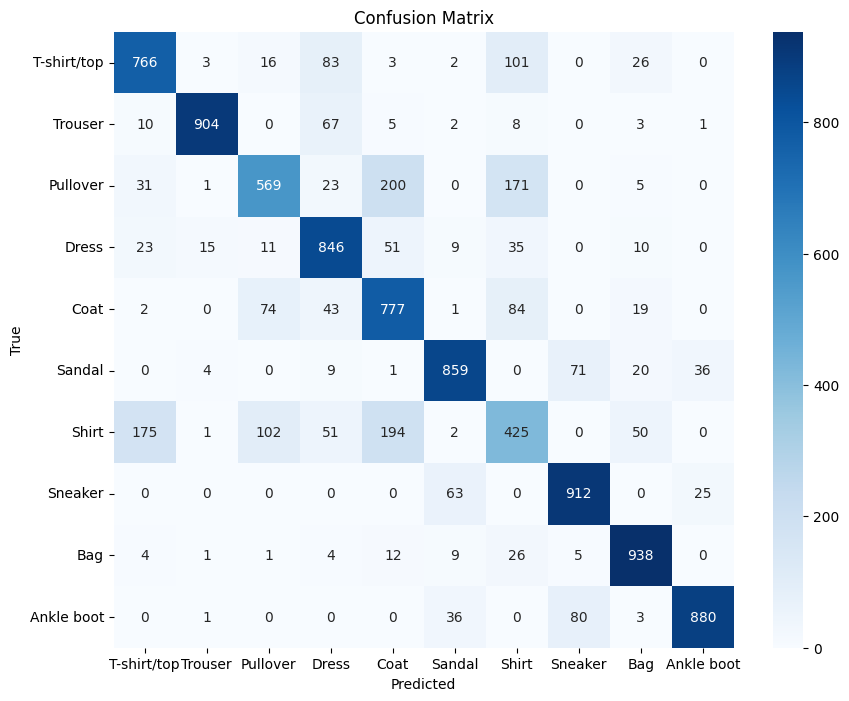

In [90]:
import seaborn as sns
# Create the confusion matrix
cm = confusion_matrix(test_labels, y_preds)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, )
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

In [91]:
import random

def plot_random_image(model,images,true_labels,classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  #Set up random int
  i = random.randint(0, len(images))

  #Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  #Plot the image
  plt.imshow(target_image, cmap = plt.cm.binary)

  #Change the color of the titles depending on the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  #Add xlabel information(prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color = color) #set the color to green or red based on if prediction is right or wrong


1/1 [==============================] - 0s 17ms/step


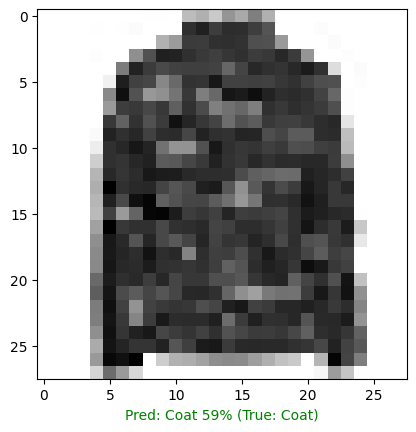

In [106]:
#Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

##What patterns is our model learning?

In [107]:
# Find the layers of our most recent model
model_14.layers

In [108]:
# Extract a particular layer
model_14.layers[1]

In [110]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

weights, weights.shape

(array([[-0.7560629 ,  0.9991946 ,  0.1751727 , -0.6074511 ],
        [-0.12048272,  0.84648114, -0.1586991 , -0.6897878 ],
        [-0.05775568,  1.3419282 , -0.26558363, -1.1292703 ],
        ...,
        [-1.405183  ,  0.24762076,  0.6580574 ,  0.02132033],
        [-1.7945007 , -0.1002283 ,  0.5518232 ,  0.7537185 ],
        [-0.9499009 ,  0.75235564,  0.19271146,  0.01951875]],
       dtype=float32),
 (784, 4))

In [111]:
model_14.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 4)                 3140      
                                                                 
 dense_36 (Dense)            (None, 4)                 20        
                                                                 
 dense_37 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [112]:
# Bias and biasses shapes
biases, biases.shape

(array([-2.5970027 ,  0.9210597 ,  1.4209139 ,  0.21159059], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector gets initialized as zeros (at least in the case of a Tensorflow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [114]:
model_14.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 4)                 3140      
                                                                 
 dense_36 (Dense)            (None, 4)                 20        
                                                                 
 dense_37 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


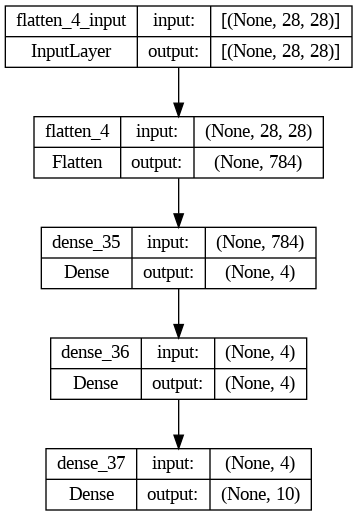

In [115]:
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14,show_shapes=True)